In [14]:
%pylab inline
from sklearn import ensemble, model_selection, metrics, feature_selection
import pandas as pd
import seaborn as sns
import timeit

Populating the interactive namespace from numpy and matplotlib


/home/jules/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape

(7352, 563)

In [4]:
test.shape

(2947, 563)

In [5]:
train.describe(include="all")

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAYING
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1407
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,NaN
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,NaN
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,NaN
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,NaN
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,NaN
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,NaN


In [6]:
train["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

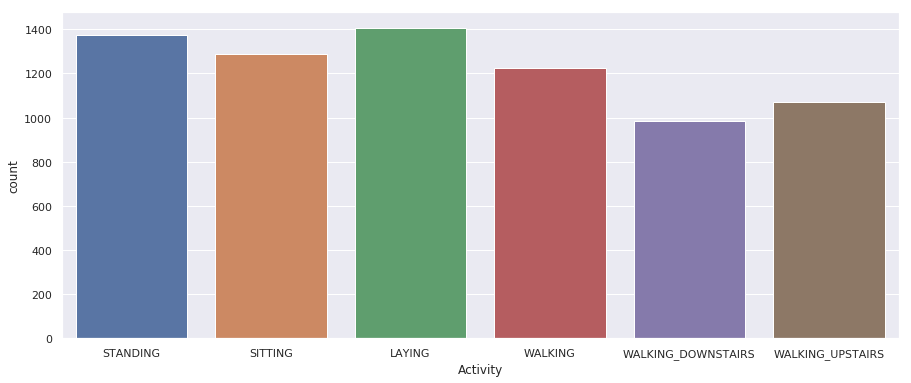

In [7]:
# sns.set()
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x="Activity", data=train)

In [8]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

In [16]:
rf = ensemble.RandomForestClassifier(500, n_jobs=-1)
start_time = timeit.default_timer()
rf.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("All features accuracy: ", metrics.accuracy_score(y_test, rf.predict(X_test)), "with a time of ", elapsed)

All features accuracy:  0.9260264675941635 with a time of  9.762853517999247


In [10]:
pd.DataFrame(rf.feature_importances_.T, index=X_train.columns).sort_values(0, ascending=False)

,0
tGravityAcc-min()-X,0.032456
tGravityAcc-energy()-X,0.030667
tGravityAcc-mean()-X,0.029621
"angle(Y,gravityMean)",0.028420
tGravityAcc-max()-X,0.026830
tGravityAcc-min()-Y,0.026298
tGravityAcc-mean()-Y,0.024570
tGravityAcc-max()-Y,0.023615
"angle(X,gravityMean)",0.019206
tGravityAcc-energy()-Y,0.015926


In [17]:
modelReducer = feature_selection.SelectFromModel(rf,threshold=0.005, prefit=True)
feature_idx = modelReducer.get_support()
X_train2 = pd.DataFrame(modelReducer.transform(X_train.copy()), columns=X_train.columns[feature_idx])

In [18]:
rf2 = ensemble.RandomForestClassifier(500, n_jobs=-1)
start_time = timeit.default_timer()
rf2.fit(X_train2, y_train)
elapsed = timeit.default_timer() - start_time
print(X_train2.shape[1], " best features accuracy: ", 
      metrics.accuracy_score(y_test, rf2.predict(modelReducer.transform(X_test))), "with a time of ", elapsed)

55  best features accuracy:  0.8747879199185612 with a time of  2.911461829000473
